In [2]:
import tensorflow as tf
from dataset import WindowGenerator, Speleothem_dataset
import matplotlib.pyplot as plt

In [3]:
speleothem = Speleothem_dataset('../image/speleothem_2.tif')

In [95]:
import numpy as np
x = np.arange(0, 100, 0.01)
y = np.cos(x)

y = y.reshape((len(y), 1))
tam = len(y)
train_df = y[:int(0.7*tam)]
validation_df = y[int(0.7*tam):int(0.9*tam)]
test_df = y[int(0.9*tam):]

In [96]:
# OUT_STEPS = 24

# multi_window = WindowGenerator(
#     input_width=24, label_width=24, shift=24,
#     train_df=speleothem.train_df, validation_df=speleothem.validation_df, test_df=speleothem.test_df
# )

OUT_STEPS = 24

multi_window = WindowGenerator(
    input_width=24, label_width=24, shift=24,
    train_df=train_df, validation_df=validation_df, test_df=test_df
)

In [109]:
num_features = 240
for example_inputs, example_labels in multi_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 1)
Labels shape (batch, time, features): (32, 24, 1)


In [98]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [99]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.validation,
                      callbacks=[early_stopping])
  return history

In [100]:
history = compile_and_fit(dense, multi_window)

Epoch 1/20
218/218 [==============================] - 1s 4ms/step - loss: 0.0599 - mean_absolute_error: 0.1903 - val_loss: 0.0293 - val_mean_absolute_error: 0.1549
Epoch 2/20
218/218 [==============================] - 1s 3ms/step - loss: 0.0285 - mean_absolute_error: 0.1515 - val_loss: 0.0290 - val_mean_absolute_error: 0.1538
Epoch 3/20
218/218 [==============================] - 1s 3ms/step - loss: 0.0284 - mean_absolute_error: 0.1515 - val_loss: 0.0290 - val_mean_absolute_error: 0.1538
Epoch 4/20
218/218 [==============================] - 1s 3ms/step - loss: 0.0284 - mean_absolute_error: 0.1513 - val_loss: 0.0290 - val_mean_absolute_error: 0.1539
Epoch 5/20
218/218 [==============================] - 1s 3ms/step - loss: 0.0287 - mean_absolute_error: 0.1521 - val_loss: 0.0294 - val_mean_absolute_error: 0.1550


In [104]:
predictions = dense(multi_window.train_df)

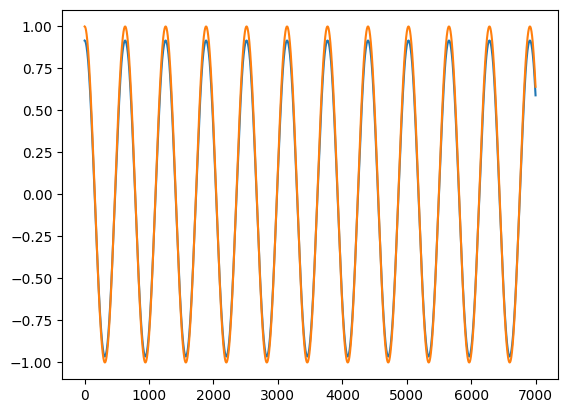

In [108]:
plt.plot(predictions[:,0,0])
plt.plot(multi_window.train_df)

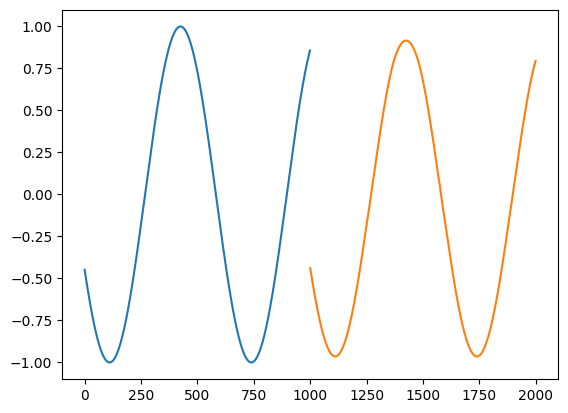

In [103]:
plt.plot(np.arange(0,len(multi_window.test_df)), multi_window.test_df)
plt.plot(np.arange(len(multi_window.test_df), len(multi_window.test_df)+ len(predictions[:,0,0])), predictions[:,0,0])